In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data = pd.DataFrame(data)

In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
data = data.drop(['User ID'], axis =1)

In [10]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
corr = data.corr()

<AxesSubplot:>

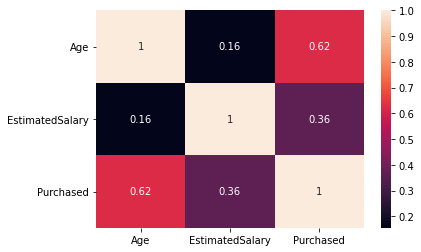

In [12]:
sns.heatmap(corr,annot = True)

In [13]:
data.duplicated().sum()

20

In [14]:
data = data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
x = data[['Age','EstimatedSalary']]
y = data['Purchased']

In [18]:
x_train, x_test, y_train ,y_test = train_test_split(x,y,train_size =0.7,test_size = 0.3,random_state = 56)

In [19]:
#feature scaling

standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [20]:
#fitting model to training data set

log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# prediction for tes_data set

y_train_pred = log_reg.predict(x_train)
y_train_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [22]:
y_test_pred = log_reg.predict(x_test)
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [23]:
from matplotlib.colors import ListedColormap

## Visualization of Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


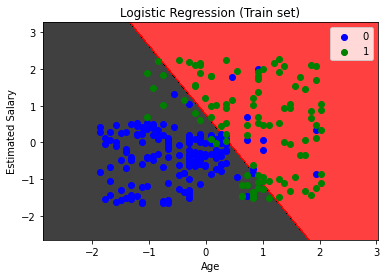

In [24]:
x_set , y_set = x_train , y_train

#create meshgrid for background
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1 , stop = x_set[:,0].max()+1, step = 0.01),
                   np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.01))

# predict on meshgrid points
grid_points = np.c_[x1.ravel(), x2.ravel()]
z = log_reg.predict(grid_points)
z = z.reshape(x1.shape)


# Plot the decision boundary using contourf

plt.contourf(x1,x2,z,alpha=0.75,cmap=ListedColormap(['black','red']))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

# Scatter plot for each class with distinct colors
for i,j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                   c = ListedColormap(['blue','green'])(i),label =j)
        
# plot details
plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualization of Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


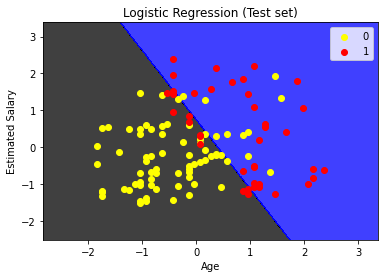

In [25]:
x_set , y_set = x_test, y_test

#create meshgrid for background

x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1 , stop = x_set[:,0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min()-1 , stop = x_set[:,1].max()+1, step = 0.01))

# predict on meshgrid points

grid_points = np.c_[x1.ravel(),x2.ravel()]
z = log_reg.predict(grid_points)
z = z.reshape(x1.shape)

# Plot the decision boundary using contourf

plt.contourf(x1,x2,z,alpha = 0.75,cmap= ListedColormap(['black','blue']))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

# Scatter plot for each class with distinct colors

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set==j,1], 
                c = ListedColormap(['yellow','red'])(i),label=j)

# plot details

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_test_pred)
conf_matrix

array([[64, 10],
       [12, 28]], dtype=int64)

<AxesSubplot:>

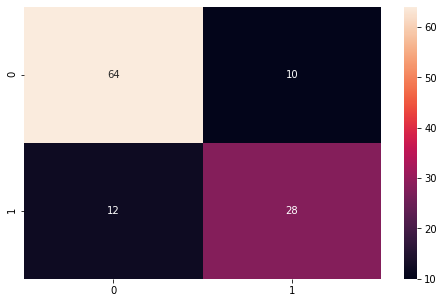

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix,annot = True,ax=ax)

In [28]:
# Accuracy

accuracy = (64+28)/len(y_test)
accuracy

0.8070175438596491

In [29]:
# miss classification rate

mis_cla_rate  = (10+12)/len(y_test)
mis_cla_rate

0.19298245614035087

In [30]:
#Accuracy rate

print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy:  0.8070175438596491


In [31]:
# pricision

print("Precision: ", metrics.precision_score(y_test,y_test_pred))

Precision:  0.7368421052631579


In [32]:
# recall

print("Recall: ", metrics.recall_score(y_test,y_test_pred))

Recall:  0.7


In [33]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8969594594594594

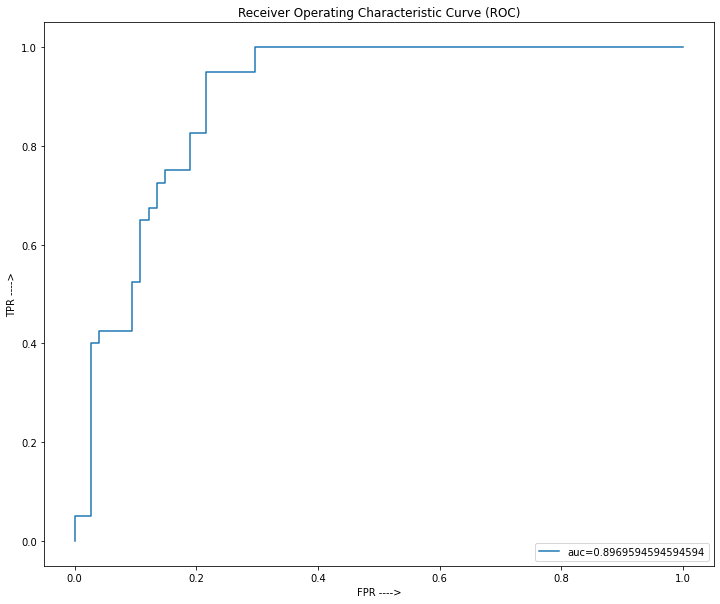

In [34]:
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## INTERPRETATION

    AUC Range	Interpretation
    0.90–1.00	Excellent model
    0.80–0.90	Good model
    0.70–0.80	Fair/Acceptable model
    0.60–0.70	Poor model
    0.50–0.60	Very poor
    
    Since our model's AUC (0.897) falls in the Good to Excellent range, it indicates a very strong performance.
    logistic regression model is highly effective at classifying the test data.
    There is minimal overlap between the distributions of the positive and negative classes.
    We can confidently rely on this model for predictions.